# Impaired Driving Death Rate in the United States in 2012 and 2014

In [3]:
options(repr.plot.width = 7, repr.plot.height = 4, repr.plot.res = 300)
install.packages("maps")
library("tidyverse")
library("maps")
install.packages("gridExtra")    
library("gridExtra") 

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



## Explore the data

This dataset is provided by the __[Center of Disease Control and Prevention: National Center for Injury Prevention and Control](https://data.cdc.gov/Motor-Vehicle/Impaired-Driving-Death-Rate-by-Age-and-Gender-2012/ebbj-sh54)__ and reports rate of death due to an impaired driver. An impaired driver was defined as having a BAC ≥ 0.08%, and death rate is reported by gender and age for the year 2012 and 2014 for all states in the United States. To compare the death rate between states, I joined this dataset with a United States state data map (`state` using the `maps` package) to create a map visualization. Overall, state impaired driving death rate decreased from 3.916 deaths per 100,000 population in 2012 (`mean12`) to 3.624 deaths per 100,000 population in 2014 (`mean14`). However, the states with a high rate of impaired driving death rate in 2012 persisted to have a high death rate in 2014. Montana had the 2nd highest death rate in both 2012 (`top3_impaired12`) and 2014 (`top3_impaired14`). 

In [2]:
impaired = read_csv("https://raw.githubusercontent.com/jenewong/BIOS512/main/Data/Impaired.csv", 
                    col_types = cols())
impaired = impaired %>% 
    mutate(State = tolower(State))
impaired %>% head

State,Location,"All Ages, 2012","All Ages, 2014","Ages 0-20, 2012","Ages 0-20, 2014","Ages 21-34, 2012","Ages 21-34, 2014","Ages 35+, 2012","Ages 35+, 2014","Male, 2012","Male, 2014","Female, 2012","Female, 2014"
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
connecticut,"Connecticut (41.562661, -72.64984)",2.4,2.7,NA,NA,5.9,6.1,2.1,2.5,3.7,4.6,1.1,NA
kentucky,"Kentucky (37.645973, -84.774968)",4.0,3.9,1.8,2.0,7.2,7.8,3.7,3.4,6.5,6.5,1.5,1.3
south dakota,"South Dakota (44.35313, -100.373529)",5.7,5.6,NA,NA,NA,NA,NA,6.2,7.4,8.7,NA,NA
oklahoma,"Oklahoma (35.472031, -97.521068)",5.6,4.0,NA,NA,10.5,7.4,5.8,3.9,9.3,6.0,1.9,2.1
west virginia,"West, Virginia (38.665511, -80.712638)",5.6,4.7,NA,NA,12.9,10.0,4.4,4.0,9.3,7.1,NA,NA
virginia,"Virginia (37.542681, -78.457889)",2.5,2.5,1.2,1.2,4.5,5.1,2.6,2.3,4.1,3.9,0.9,1.2


In [11]:
mean12 = impaired %>% 
    summarize(mean.rate = mean(`All Ages, 2012`, na.rm = TRUE))
mean12

mean.rate
<dbl>
3.916


In [12]:
mean14 = impaired %>% 
    summarize(mean.rate = mean(`All Ages, 2014`, na.rm = TRUE))
mean14

mean.rate
<dbl>
3.62449


In [4]:
main_states = map_data("state") 

main_states %>% head

,long,lat,group,order,region,subregion
,<dbl>,<dbl>,<dbl>,<int>,<chr>,<chr>
1,-87.46201,30.38968,1,1,alabama,NA
2,-87.48493,30.37249,1,2,alabama,NA
3,-87.52503,30.37249,1,3,alabama,NA
4,-87.53076,30.33239,1,4,alabama,NA
5,-87.57087,30.32665,1,5,alabama,NA
6,-87.58806,30.32665,1,6,alabama,NA


In [5]:
impaired_states = inner_join(main_states, impaired, by = c("region" = "State"))
impaired_states %>% head

,long,lat,group,order,region,subregion,Location,"All Ages, 2012","All Ages, 2014","Ages 0-20, 2012","Ages 0-20, 2014","Ages 21-34, 2012","Ages 21-34, 2014","Ages 35+, 2012","Ages 35+, 2014","Male, 2012","Male, 2014","Female, 2012","Female, 2014"
,<dbl>,<dbl>,<dbl>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,-87.46201,30.38968,1,1,alabama,NA,"Alabama (32.840572, -86.631857)",5.5,5.5,2.7,2.1,10.3,10,5,5.5,8.4,8.6,2.9,2.6
2,-87.48493,30.37249,1,2,alabama,NA,"Alabama (32.840572, -86.631857)",5.5,5.5,2.7,2.1,10.3,10,5,5.5,8.4,8.6,2.9,2.6
3,-87.52503,30.37249,1,3,alabama,NA,"Alabama (32.840572, -86.631857)",5.5,5.5,2.7,2.1,10.3,10,5,5.5,8.4,8.6,2.9,2.6
4,-87.53076,30.33239,1,4,alabama,NA,"Alabama (32.840572, -86.631857)",5.5,5.5,2.7,2.1,10.3,10,5,5.5,8.4,8.6,2.9,2.6
5,-87.57087,30.32665,1,5,alabama,NA,"Alabama (32.840572, -86.631857)",5.5,5.5,2.7,2.1,10.3,10,5,5.5,8.4,8.6,2.9,2.6
6,-87.58806,30.32665,1,6,alabama,NA,"Alabama (32.840572, -86.631857)",5.5,5.5,2.7,2.1,10.3,10,5,5.5,8.4,8.6,2.9,2.6


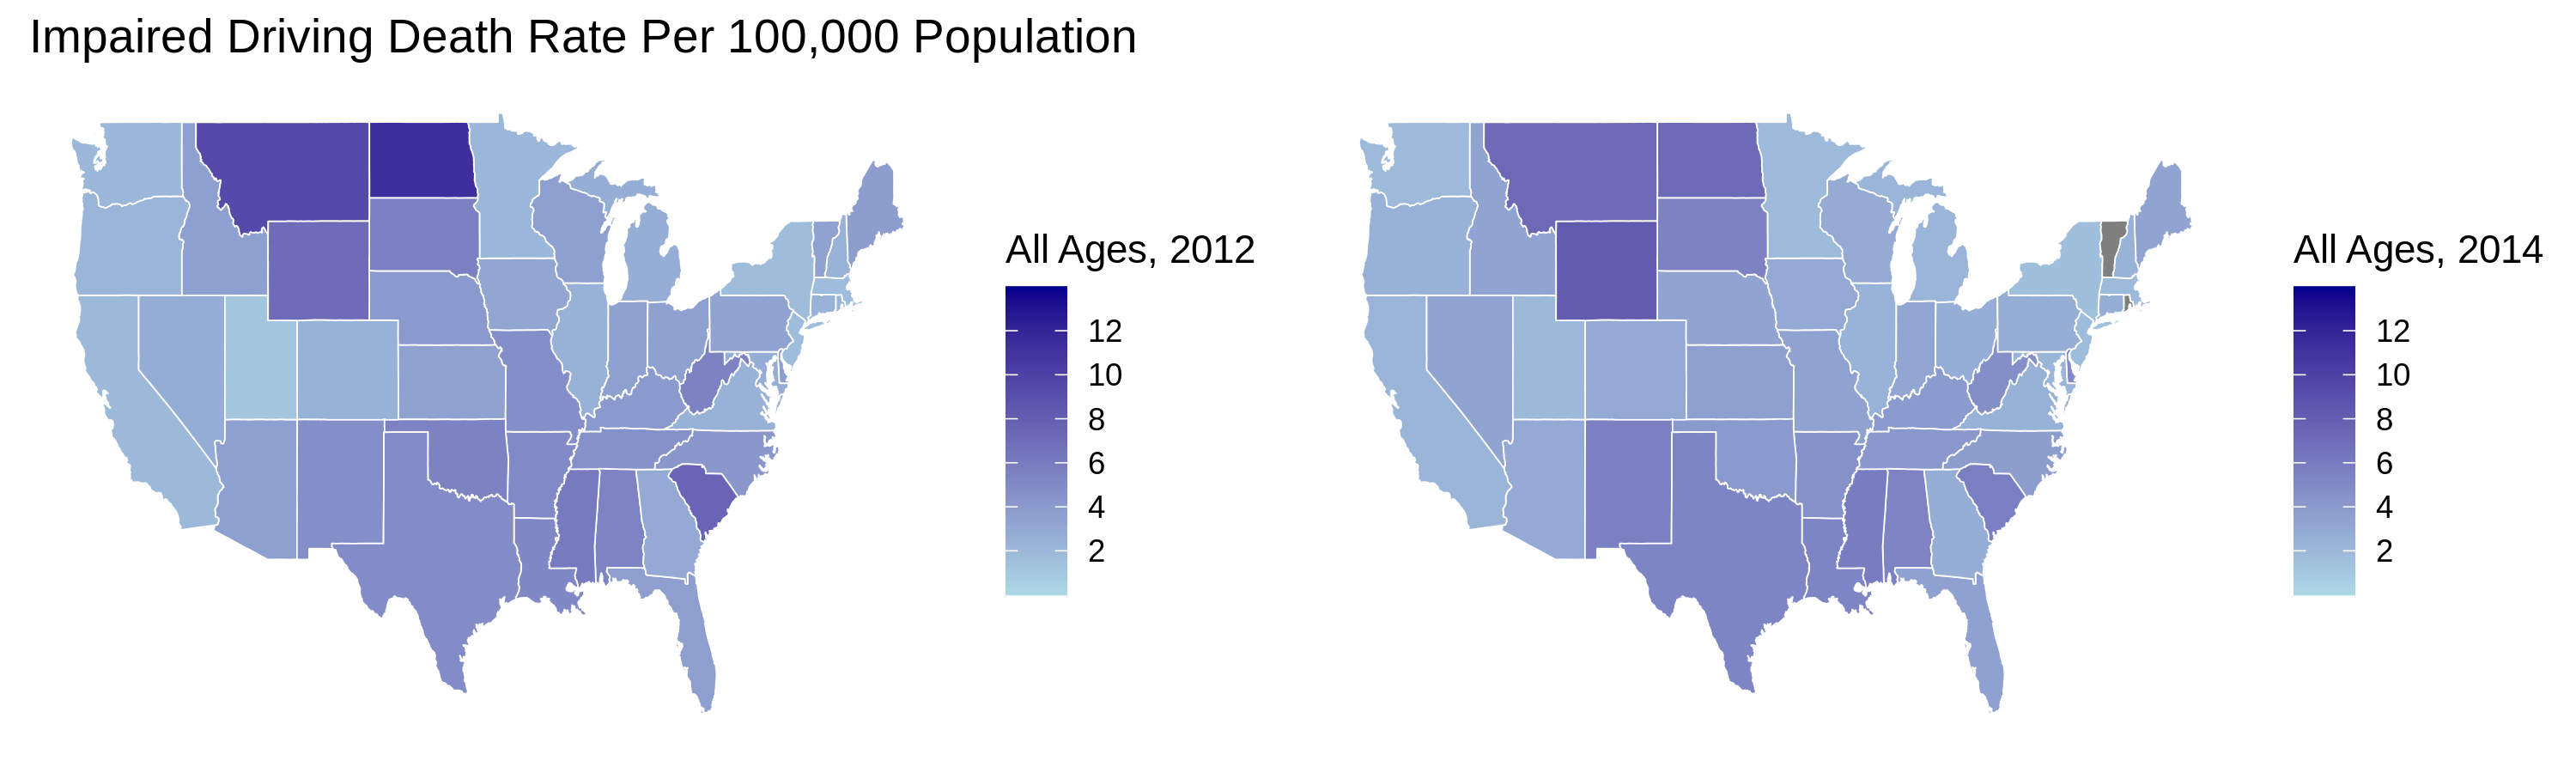

In [25]:
p = ggplot() + 
  geom_polygon(data = impaired_states, aes(x = long, y = lat, group = group, fill = `All Ages, 2012`),
                color = "white", size = 0.2)
p = p + theme_minimal()
p = p + theme(axis.title.x = element_blank(),
                axis.text.x = element_blank(),
                axis.ticks.x = element_blank(),
                axis.title.y = element_blank(),
                axis.text.y = element_blank(),
                axis.ticks.y = element_blank(),
                panel.grid.major = element_blank(),
                panel.grid.minor = element_blank())
p = p + scale_fill_continuous(name = "All Ages, 2012", 
            low = "lightblue", high = "darkblue",limits = c(0, 14), 
            breaks = c(2, 4, 6, 8, 10, 12), na.value = "grey50")
p = p + labs(title = "Impaired Driving Death Rate Per 100,000 Population", 
             x = "Longitude",
             y = "Latitude")

p2 = ggplot() + 
  geom_polygon(data = impaired_states, aes(x = long, y = lat, group = group, fill = `All Ages, 2014`),
                color = "white", size = 0.2)
p2 = p2 + theme_minimal()
p2 = p2 + theme(axis.title.x = element_blank(),
                axis.text.x = element_blank(),
                axis.ticks.x = element_blank(),
                axis.title.y = element_blank(),
                axis.text.y = element_blank(),
                axis.ticks.y = element_blank(),
                panel.grid.major = element_blank(),
                panel.grid.minor = element_blank())
p2 = p2 + scale_fill_continuous(name = "All Ages, 2014", 
            low = "lightblue", high = "darkblue",limits = c(0, 14), 
            breaks = c(2, 4, 6, 8, 10, 12), na.value = "grey50")
p2 = p2 + labs(title = "", x = "Longitude", y = "Latitude")

options(repr.plot.width = 10, repr.plot.height = 3, repr.plot.res = 300)
grid.arrange(p, p2, ncol = 2)

In [9]:
top3_impaired12 = impaired %>% 
    slice_max(`All Ages, 2012`, n = 3) 

top3_impaired12 

State,Location,"All Ages, 2012","All Ages, 2014","Ages 0-20, 2012","Ages 0-20, 2014","Ages 21-34, 2012","Ages 21-34, 2014","Ages 35+, 2012","Ages 35+, 2014","Male, 2012","Male, 2014","Female, 2012","Female, 2014"
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
north dakota,"North Dakota (47.475319, -100.118428)",11.3,7.2,NA,NA,15.3,15.2,12.0,6.1,17.4,10.7,NA,NA
montana,"Montana (47.066528, -109.424416)",9.4,7.3,NA,NA,21.4,15.4,7.2,6.9,14.9,10.2,4.0,4.3
south carolina,"South Carolina (33.998822, -81.045366)",7.6,5.8,2.8,2,14.2,12.4,7.6,5.3,12.3,9.0,3.2,2.9


In [10]:
top3_impaired14 = impaired %>% 
    slice_max(`All Ages, 2014`, n = 3) 

top3_impaired14

State,Location,"All Ages, 2012","All Ages, 2014","Ages 0-20, 2012","Ages 0-20, 2014","Ages 21-34, 2012","Ages 21-34, 2014","Ages 35+, 2012","Ages 35+, 2014","Male, 2012","Male, 2014","Female, 2012","Female, 2014"
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
wyoming,"Wyoming (43.235541, -108.109827)",7.1,8.2,NA,NA,17.3,NA,NA,8.1,11.3,13.1,NA,NA
montana,"Montana (47.066528, -109.424416)",9.4,7.3,NA,NA,21.4,15.4,7.2,6.9,14.9,10.2,4,4.3
north dakota,"North Dakota (47.475319, -100.118428)",11.3,7.2,NA,NA,15.3,15.2,12.0,6.1,17.4,10.7,NA,NA


## Prepare to analyze death rate by state, gender, age, and year

The Northwestern mountain states (Montana, North Dakota, Wyoming) had high death rates in both 2012 and 2014. I was interested to see if death rate differed by gender and age, in addition to the observed difference by geographic locations of the United States. I selected states with different driving lifestyles to compare Montana to. After filtering to Montana, New York, and North Carolina and by gender, the bar chart shows that death rate by gender was consistent among the three states for 2012 and 2014. Males had a higher impaired driving death rate than females. To see how death rate differed by age, I filtered to Montana, New York, and North Carolina and by age groups. The distribution was again consistent between the three states. Overall, the impaired death rates were higher in 2012 than 2014. Those between the ages of 21-34 years old had the greatest impaired driving death rate.  


In [11]:
impaired %>% head(1)

State,Location,"All Ages, 2012","All Ages, 2014","Ages 0-20, 2012","Ages 0-20, 2014","Ages 21-34, 2012","Ages 21-34, 2014","Ages 35+, 2012","Ages 35+, 2014","Male, 2012","Male, 2014","Female, 2012","Female, 2014"
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
connecticut,"Connecticut (41.562661, -72.64984)",2.4,2.7,NA,NA,5.9,6.1,2.1,2.5,3.7,4.6,1.1,NA


In [12]:
impaired_longer = impaired %>%
    pivot_longer(cols = c(-1, -2),
                 names_pattern = "(.*), (....)",
                 names_to = c("Gender/Age", "Year"), 
                 values_to = "Death Rate")
impaired_longer %>% head(12)

State,Location,Gender/Age,Year,Death Rate
<chr>,<chr>,<chr>,<chr>,<dbl>
connecticut,"Connecticut (41.562661, -72.64984)",All Ages,2012,2.4
connecticut,"Connecticut (41.562661, -72.64984)",All Ages,2014,2.7
connecticut,"Connecticut (41.562661, -72.64984)",Ages 0-20,2012,NA
connecticut,"Connecticut (41.562661, -72.64984)",Ages 0-20,2014,NA
connecticut,"Connecticut (41.562661, -72.64984)",Ages 21-34,2012,5.9
connecticut,"Connecticut (41.562661, -72.64984)",Ages 21-34,2014,6.1
connecticut,"Connecticut (41.562661, -72.64984)",Ages 35+,2012,2.1
connecticut,"Connecticut (41.562661, -72.64984)",Ages 35+,2014,2.5
connecticut,"Connecticut (41.562661, -72.64984)",Male,2012,3.7


State,Location,Gender/Age,Year,Death Rate
<chr>,<chr>,<chr>,<chr>,<dbl>
NEW YORK,"New York (42.827004, -75.543966)",Male,2012,2.7
NEW YORK,"New York (42.827004, -75.543966)",Male,2014,2.4
NEW YORK,"New York (42.827004, -75.543966)",Female,2012,0.8
NEW YORK,"New York (42.827004, -75.543966)",Female,2014,0.8
MONTANA,"Montana (47.066528, -109.424416)",Male,2012,14.9
MONTANA,"Montana (47.066528, -109.424416)",Male,2014,10.2
MONTANA,"Montana (47.066528, -109.424416)",Female,2012,4.0
MONTANA,"Montana (47.066528, -109.424416)",Female,2014,4.3
NORTH CAROLINA,"North Carolina (35.46622, -79.15925)",Male,2012,6.8


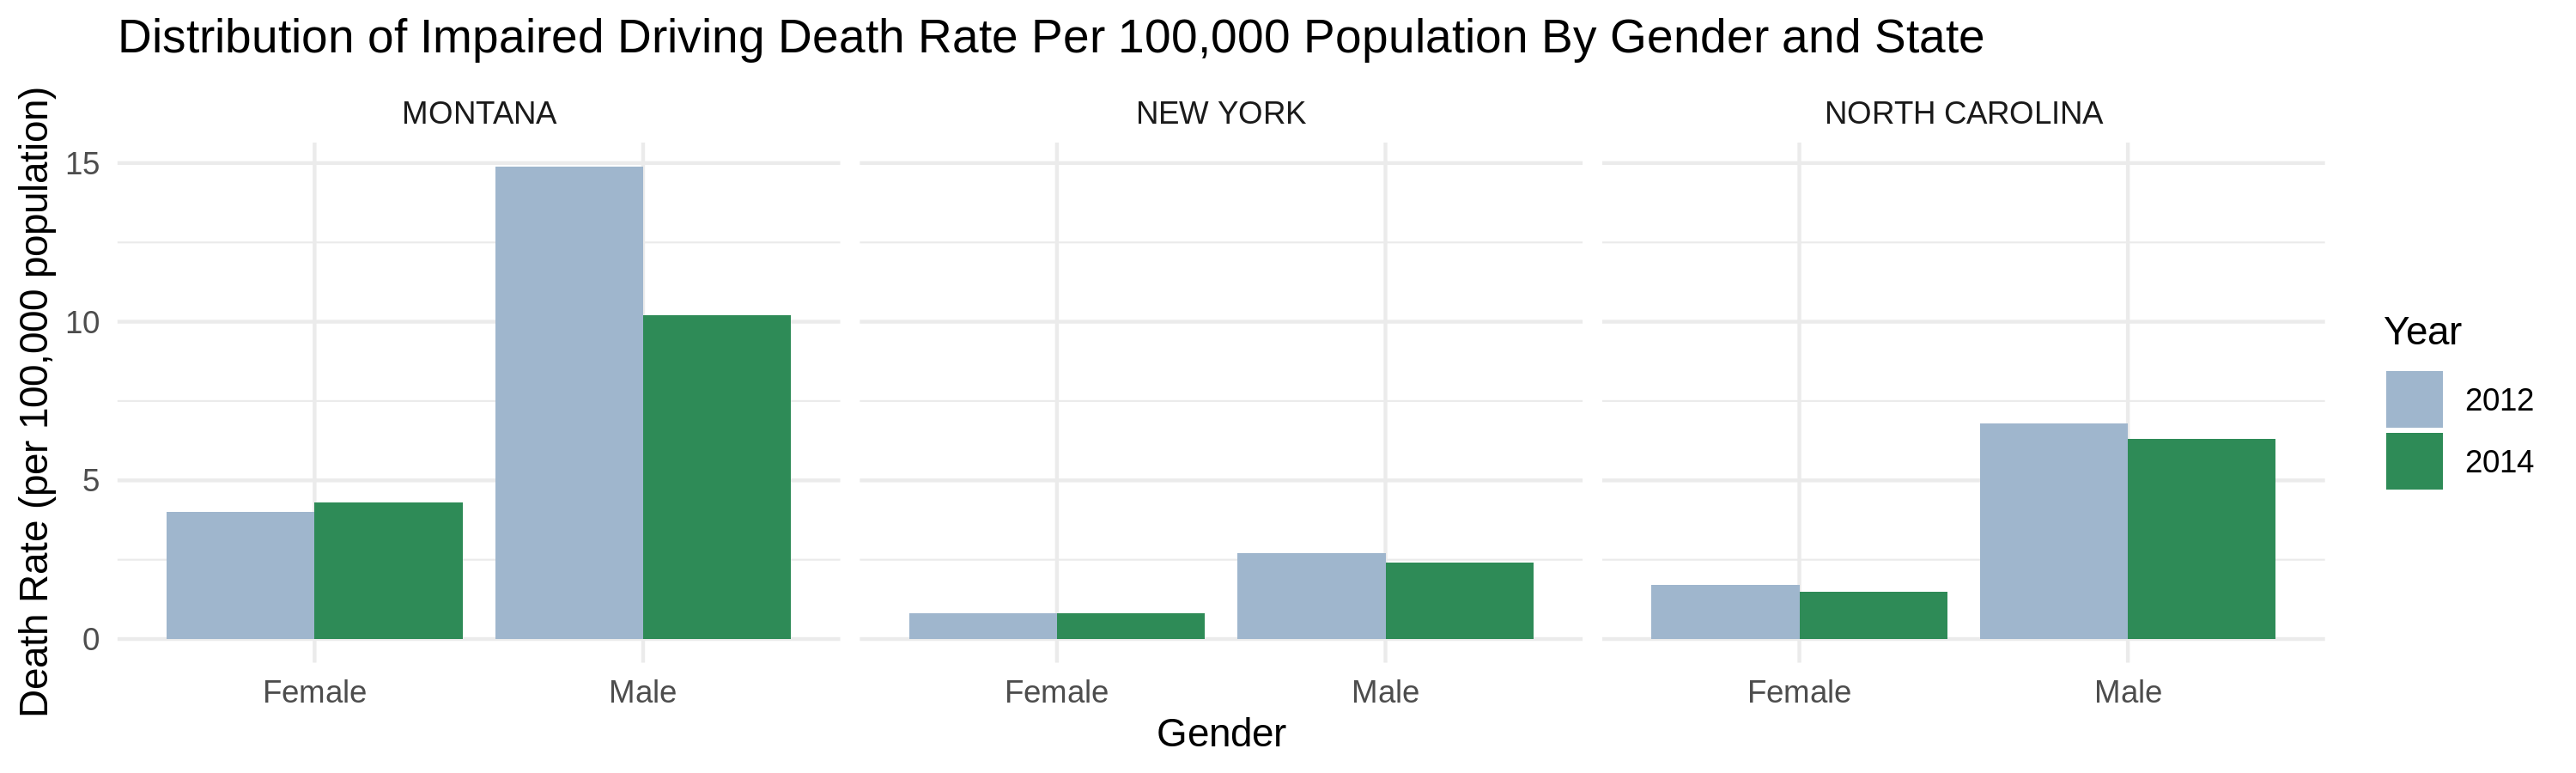

In [27]:
impaired_longer_3 = impaired_longer %>%
    filter(State %in% c("montana", "new york", "north carolina"), `Gender/Age` %in% c("Male", "Female")) %>%
    mutate(State = toupper(State))
impaired_longer_3

options(repr.plot.width = 10, repr.plot.height = 3, repr.plot.res = 300)
p3 = ggplot(impaired_longer_3, aes(x = `Gender/Age`, y = `Death Rate`, group = Year, fill = Year))
p3 = p3 + geom_bar(stat = 'identity', position = "dodge") 
p3 = p3 + facet_wrap(~State)
p3 = p3 + theme_minimal()
p3 = p3 + labs(title = "Distribution of Impaired Driving Death Rate Per 100,000 Population By Gender and State", 
               x = "Gender", y = "Death Rate (per 100,000 population)")
p3 = p3 + scale_fill_manual(values = c("slategray3", "seagreen"))
p3


State,Location,Gender/Age,Year,Death Rate
<chr>,<chr>,<chr>,<chr>,<dbl>
NEW YORK,"New York (42.827004, -75.543966)",All Ages,2012,1.7
NEW YORK,"New York (42.827004, -75.543966)",All Ages,2014,1.6
NEW YORK,"New York (42.827004, -75.543966)",Ages 0-20,2012,0.6
NEW YORK,"New York (42.827004, -75.543966)",Ages 0-20,2014,0.7
NEW YORK,"New York (42.827004, -75.543966)",Ages 21-34,2012,3.3
NEW YORK,"New York (42.827004, -75.543966)",Ages 21-34,2014,3.0
NEW YORK,"New York (42.827004, -75.543966)",Ages 35+,2012,1.7
NEW YORK,"New York (42.827004, -75.543966)",Ages 35+,2014,1.5
MONTANA,"Montana (47.066528, -109.424416)",All Ages,2012,9.4


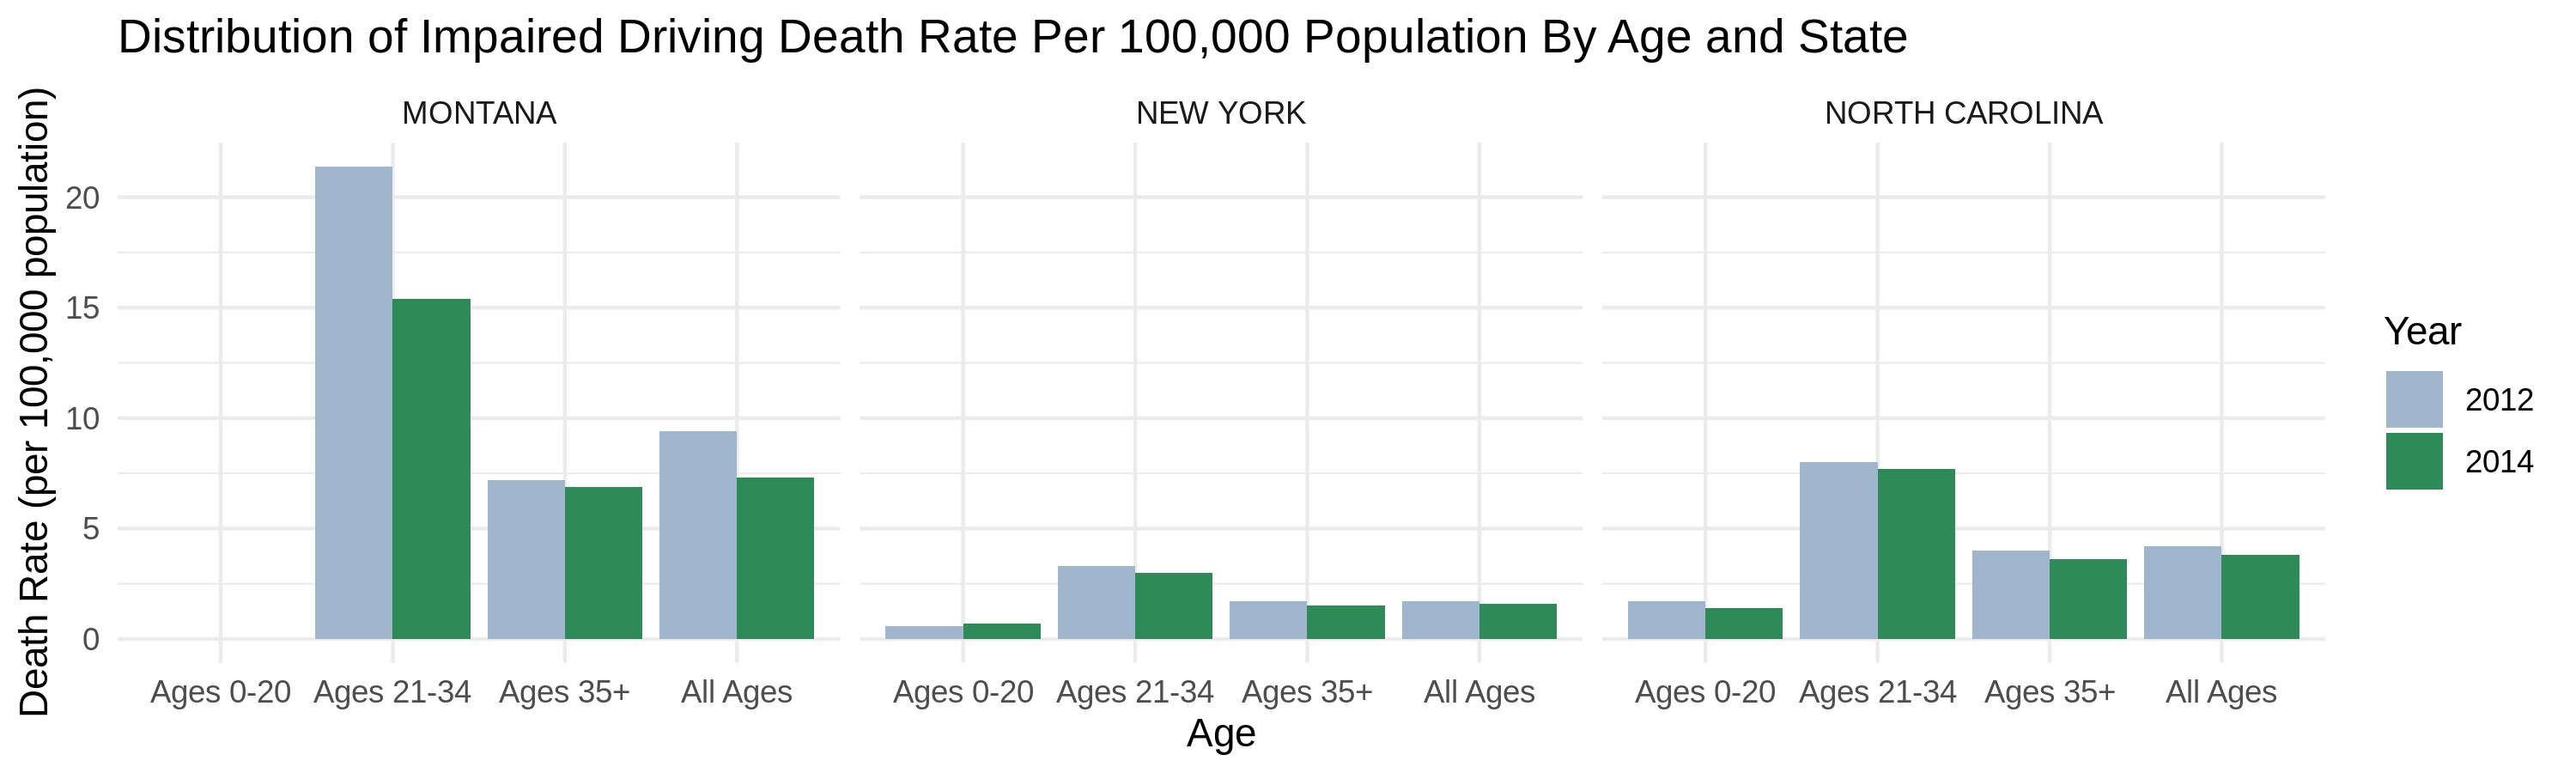

In [26]:
impaired_longer_3_age = impaired_longer %>%
    filter(State %in% c("montana", "new york", "north carolina"), 
           `Gender/Age` %in% c("All Ages", "Ages 0-20", "Ages 21-34", "Ages 35+")) %>%
    mutate(State = toupper(State))
impaired_longer_3_age

options(repr.plot.width = 10, repr.plot.height = 3, repr.plot.res = 300)
p4 = ggplot(impaired_longer_3_age, aes(x = `Gender/Age`, y = `Death Rate`, group = Year, fill = Year))
p4 = p4 + geom_bar(stat = 'identity', position = "dodge", na.rm = TRUE) 
p4 = p4 + facet_wrap(~State)
p4 = p4 + theme_minimal()
p4 = p4 + labs(title = "Distribution of Impaired Driving Death Rate Per 100,000 Population By Age and State", 
               x = "Age", y = "Death Rate (per 100,000 population)")
p4 = p4 + scale_fill_manual(values = c("slategray3", "seagreen"))
p4


# Conclusion
The trends in year, age, and gender were consistent between the three states. Males had a higher impaired driving death rate than females, and those between the ages of 21-34 years old had the greatest impaired driving death rate. The difference, based on the available variables, is likely due to geographic location. New York and North Carolina are relatively more urban than Montana. Therefore, I expect those states to be more likely to utilize rideshare apps such as Uber and Lyft.